In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

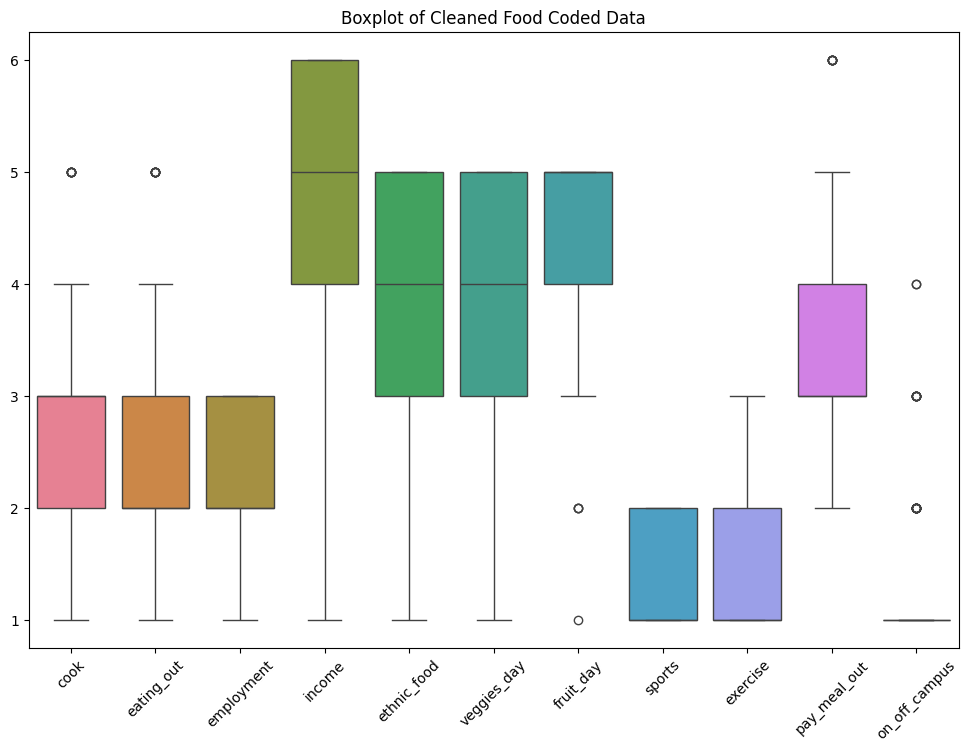

In [ ]:
data = pd.read_csv("./food_coded.csv")

filtered_data = data[['cook', 'eating_out', 'employment', 'income', 'ethnic_food', 'veggies_day', 'fruit_day', 'sports', 'exercise', 'pay_meal_out', 'on_off_campus']]

cleaned_data = filtered_data.dropna()

cleaned_data = cleaned_data.apply(pd.to_numeric, errors='coerce')

cleaned_data = cleaned_data.dropna()

plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data)
plt.xticks(rotation=45)
plt.title('Boxplot of Cleaned Food Coded Data')
plt.show()


In [ ]:
cleaned_data.head()

,cook,eating_out,employment,income,ethnic_food,veggies_day,fruit_day,sports,exercise,pay_meal_out,on_off_campus,Cluster
0,2.0,3,3.0,5.0,1,5,5,1.0,1.0,2,1.0,2
1,3.0,2,2.0,4.0,4,4,4,1.0,1.0,4,1.0,0
2,1.0,2,3.0,6.0,5,5,5,2.0,2.0,3,2.0,2
3,2.0,2,3.0,6.0,5,3,4,2.0,3.0,2,1.0,2
4,1.0,2,2.0,6.0,4,4,4,1.0,1.0,4,1.0,0


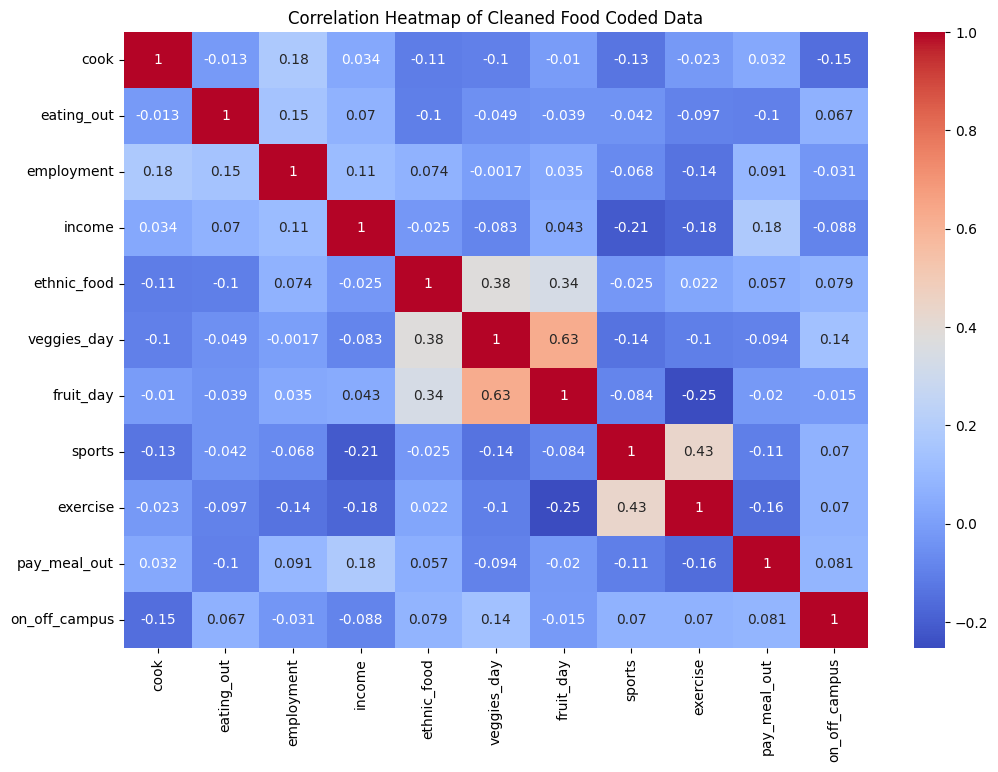

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cleaned_data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap of Cleaned Food Coded Data')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(cleaned_data[['income','employment']])

scaled_df=pd.DataFrame(scaled_data, columns=['income','employment'])

scaled_df.head()


,income,employment
0,0.245093,1.025755
1,-0.475769,-0.839254
2,0.965956,1.025755
3,0.965956,1.025755
4,0.965956,-0.839254


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

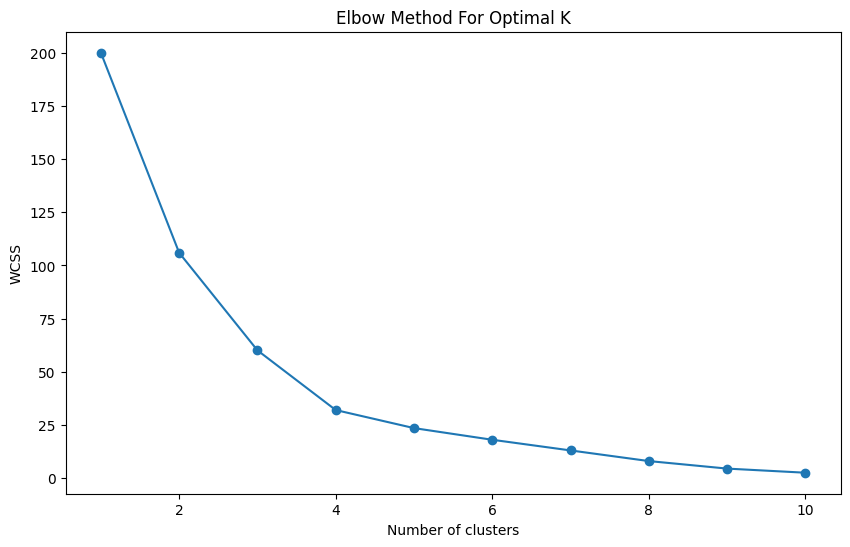

In [ ]:
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


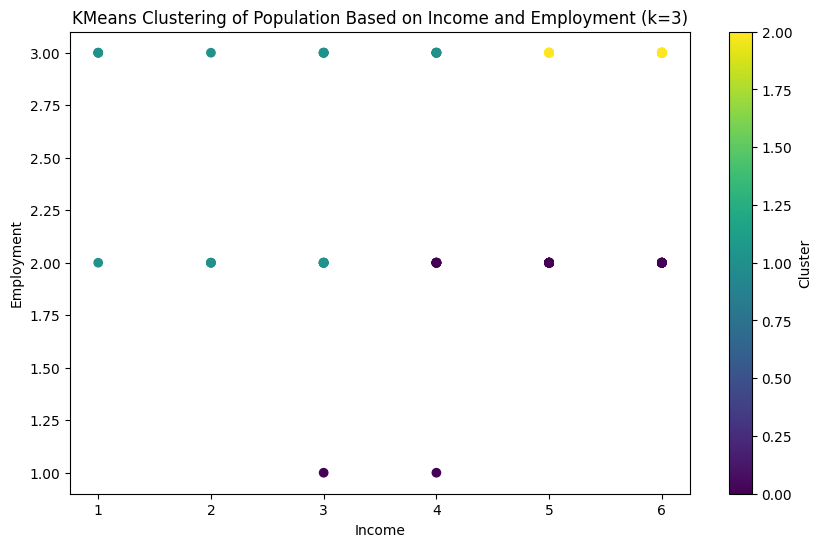

   cook  eating_out  employment  income  ethnic_food  veggies_day  fruit_day  \
0   2.0           3         3.0     5.0            1            5          5   
1   3.0           2         2.0     4.0            4            4          4   
2   1.0           2         3.0     6.0            5            5          5   
3   2.0           2         3.0     6.0            5            3          4   
4   1.0           2         2.0     6.0            4            4          4   

   sports  exercise  pay_meal_out  on_off_campus  Cluster  
0     1.0       1.0             2            1.0        2  
1     1.0       1.0             4            1.0        0  
2     2.0       2.0             3            2.0        2  
3     2.0       3.0             2            1.0        2  
4     1.0       1.0             4            1.0        0  


In [ ]:
optimal_k=3
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
kmeans.fit(scaled_df)

clusters = kmeans.fit_predict(scaled_df)

cleaned_data['Cluster'] = clusters

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['income'], cleaned_data['employment'], c=cleaned_data['Cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clustering of Population Based on Income and Employment (k=3)')
plt.xlabel('Income')
plt.ylabel('Employment')
plt.colorbar(label='Cluster')
plt.show()

print(cleaned_data.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


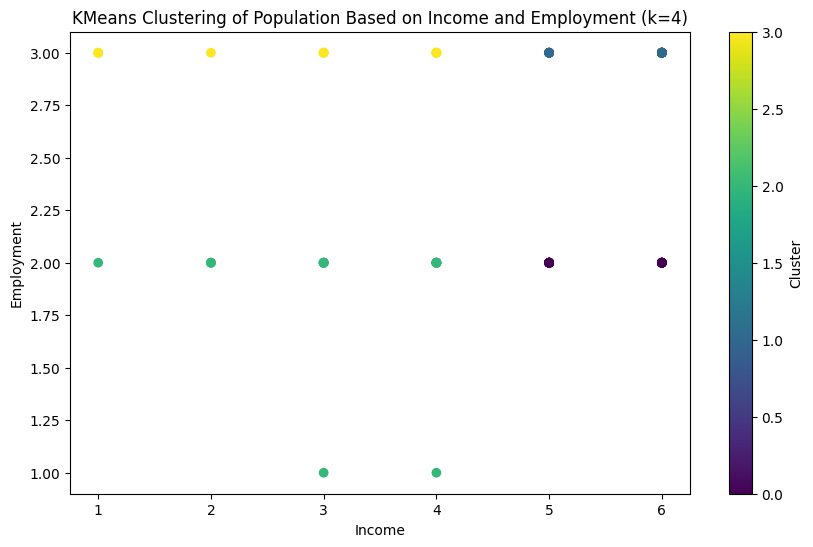

   cook  eating_out  employment  income  ethnic_food  veggies_day  fruit_day  \
0   2.0           3         3.0     5.0            1            5          5   
1   3.0           2         2.0     4.0            4            4          4   
2   1.0           2         3.0     6.0            5            5          5   
3   2.0           2         3.0     6.0            5            3          4   
4   1.0           2         2.0     6.0            4            4          4   

   sports  exercise  pay_meal_out  on_off_campus  Cluster  
0     1.0       1.0             2            1.0        1  
1     1.0       1.0             4            1.0        2  
2     2.0       2.0             3            2.0        1  
3     2.0       3.0             2            1.0        1  
4     1.0       1.0             4            1.0        0  


In [ ]:
optimal_k=4
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
kmeans.fit(scaled_df)

clusters = kmeans.fit_predict(scaled_df)

cleaned_data['Cluster'] = clusters

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['income'], cleaned_data['employment'], c=cleaned_data['Cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clustering of Population Based on Income and Employment (k=4)')
plt.xlabel('Income')
plt.ylabel('Employment')
plt.colorbar(label='Cluster')
plt.show()

print(cleaned_data.head())


In [ ]:
import requests
import pandas as pd

API_KEY = 'fsq3s7KPtbR3Yu80LS1hAwnGDAVpTN+CSXPpW/AQRvg2gj0='

BASE_URL = 'https://api.foursquare.com/v3/places/search'


locations = pd.read_csv('./50_clustered_locations_bangalore.csv')
# Define the category IDs for different amenities
restaurant_category = ','.join(map(str, range(13026, 13391)))
grocery_category = ','.join(map(str, range(17067, 17071)))
other_categories = ','.join(map(str, range(18021, 18080)))

def query_foursquare(lat, lng, category_ids, radius=1000):
    headers = {
        'Authorization': API_KEY
    }
    params = {
        'll': f'{lat},{lng}',
        'radius': radius,
        'categories': category_ids,
        'limit': 50
    }
    response = requests.get(BASE_URL, headers=headers, params=params)
    try:
        response.raise_for_status()
        return response.json().get('results', [])
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
        print("Response content:", response.text)
    except requests.exceptions.RequestException as err:
        print(f"Other error occurred: {err}")
        print("Response content:", response.text)
    except ValueError as json_err:
        print(f"JSON decode error: {json_err}")
        print("Response content:", response.text)
    return []

results = []

for lat, lng in locations:
    restaurants = query_foursquare(lat, lng, restaurant_category)
    groceries = query_foursquare(lat, lng, grocery_category)
    other_amenities = query_foursquare(lat, lng, other_categories)

    results.append({
        'lat': lat,
        'lng': lng,
        'Restaurants': len(restaurants),
        'Grocery': len(groceries),
        'Other_Amenities': len(other_amenities)
    })

df = pd.DataFrame(results)

print(df)


         lat        lng  Restaurants  Grocery  Other_Amenities
0  13.000170  77.624545           50        7               17
1  13.113421  77.568541           23        1                0
2  13.114882  77.563090           14        1                0
3  13.039492  77.555590           50        5               19
4  13.135727  77.572482           22        0                0
5  13.134563  77.572646           23        0                0
6  12.979005  77.645620           50       11               50
7  13.069250  77.595719           50        3               11
8  13.064801  77.572098           50        5                2
9  13.063300  77.580675           50        8               11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

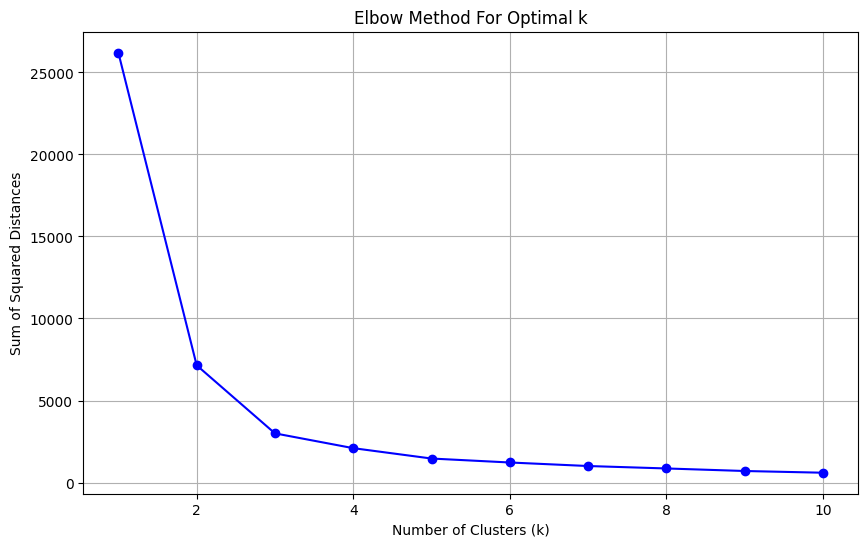

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


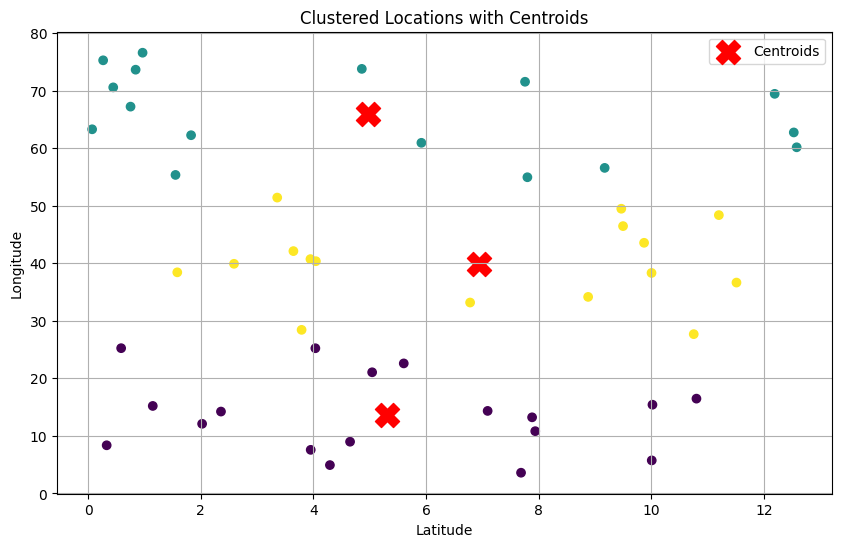

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


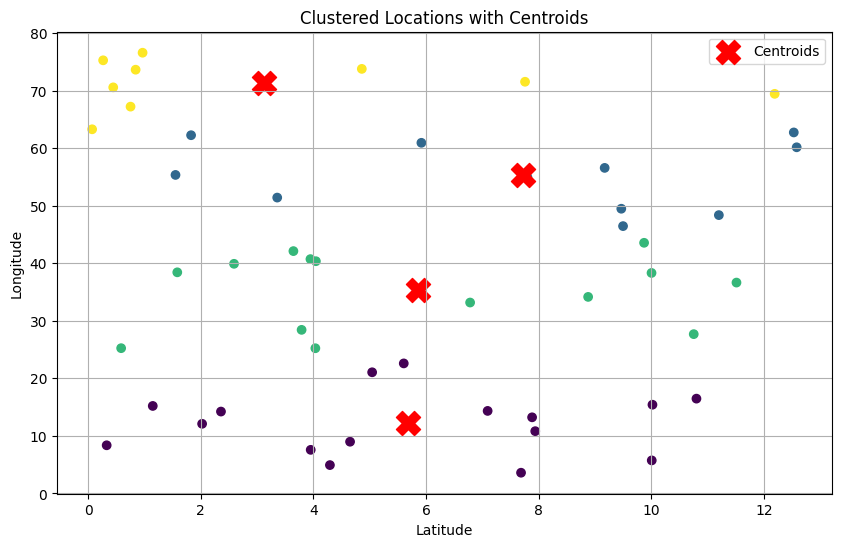

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = './50_clustered_locations_bangalore.csv'
df_locations = pd.read_csv(file_path)

# Calculate the sum of squared distances for a range of cluster numbers
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_locations[['Latitude', 'Longitude']])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_locations['Cluster'] = kmeans.fit_predict(df_locations[['Latitude', 'Longitude']])

plt.figure(figsize=(10, 6))
plt.scatter(df_locations['Latitude'], df_locations['Longitude'], c=df_locations['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustered Locations with Centroids')
plt.legend()
plt.grid(True)
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_locations['Cluster'] = kmeans.fit_predict(df_locations[['Latitude', 'Longitude']])

plt.figure(figsize=(10, 6))
plt.scatter(df_locations['Latitude'], df_locations['Longitude'], c=df_locations['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustered Locations with Centroids')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import requests
from tabulate import tabulate
from sklearn.cluster import KMeans
import random
import numpy as np
import pandas as pd
import folium



#Fetching data form HERE API for IIT Bombay
url = 'https://discover.search.hereapi.com/v1/discover?in=circle:19.1334,72.9133;r=10000&q=apartment&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'
data = requests.get(url).json()
d=json_normalize(data['items'])
d.to_csv('api-data/apartment.csv')



#Cleaning API data
d2=d[['title','address.label','distance','access','position.lat','position.lng','address.postalCode','contacts','id']]
d2.to_csv('api-data/cleaned_apartment.csv')



#Counting no. of cafes, department stores and gyms near apartments around IIT Bombay
df_final=d2[['position.lat','position.lng']]

CafeList=[]
DepList=[]
GymList=[]
latitudes = list(d2['position.lat'])
longitudes = list( d2['position.lng'])
for lat, lng in zip(latitudes, longitudes):
    radius = '1000' #Set the radius to 1000 metres
    latitude=lat
    longitude=lng

    search_query = 'cafe' #Search for any cafes
    url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'.format(latitude, longitude, radius, search_query)
    results = requests.get(url).json()
    venues=json_normalize(results['items'])
    CafeList.append(venues['title'].count())

    search_query = 'gym' #Search for any gyms
    url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'.format(latitude, longitude, radius, search_query)
    results = requests.get(url).json()
    venues=json_normalize(results['items'])
    GymList.append(venues['title'].count())

    search_query = 'department-store' #search for supermarkets
    url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'.format(latitude, longitude, radius, search_query)
    results = requests.get(url).json()
    venues=json_normalize(results['items'])
    DepList.append(venues['title'].count())

df_final['Cafes'] = CafeList
df_final['Department Stores'] = DepList
df_final['Gyms'] = GymList

print(tabulate(df_final,headers='keys',tablefmt='github'))



#Run K-means clustering on dataframe
kclusters = 3

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_final)
df_final['Cluster']=kmeans.labels_
df_final['Cluster']=df_final['Cluster'].apply(str)

print(tabulate(df_final,headers='keys',tablefmt='github'))



#Plotting clustered locations on map using Folium

#define coordinates of the college
map_bom=folium.Map(location=[19.1334,72.9133],zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'

latitudes = list(df_final['position.lat'])
longitudes = list(df_final['position.lng'])
labels = list(df_final['Cluster'])
names=list(d2['title'])
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_bom)

# add locations to map
map_bom.add_child(locations)
folium.Marker([19.1334,72.9133],popup='IIT Bombay').add_to(map_bom)

#saving the map
map_bom.save("map-IITBombay.html")

ImportError: cannot import name 'json_normalize' from 'pandas.io.json' (/usr/local/lib/python3.10/dist-packages/pandas/io/json/__init__.py)

In [ ]:
import numpy as np
from tabulate import tabulate
import pandas as pd
from sklearn.cluster import KMeans
import random
import seaborn as sns
import matplotlib.pyplot as plt


#data cleaning and extracting relevant features
df1 = pd.read_csv("codebook_food/food_coded.csv")
df=df1[["cook","diet_current_coded","eating_out","sports","exercise","fav_cuisine_coded","on_off_campus","pay_meal_out","fav_food","fruit_day","income"]]
df.dropna(axis=0,inplace=True)
df.to_csv("codebook_food/food_choices.csv")

print(tabulate(df,headers = 'keys', tablefmt = 'psql'))


#Plotting Boxplot for cleaned data
sns.boxplot(data=df, palette="Set1").tick_params(labelsize=8.7)
plt.xticks(rotation=45, ha='right')
plt.show()


#K-Means clustering on cleaned data
k = 3
kmeans = KMeans(n_clusters = k, random_state=0).fit(df)
df['Cluster']=kmeans.labels_


#Plotting Boxplot for optimal K value (K=3)
fig, axes = plt.subplots(1, k, sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=20)

for i in range(k):
     plt.sca(axes[i])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(palette="Set1",data = df[df['Cluster'] == i].drop('Cluster',1), ax=axes[i]).tick_params(labelsize=8.7)

plt.show()